# Assignment 6 - Boosting

### Importing Packages

In [2]:
import numpy as np  # Numerical package (mainly multi-dimensional arrays and linear algebra)
import pandas as pd  # A package for working with data frames
import matplotlib.pyplot as plt  # A plotting package
import tqdm.notebook as tqdm  # A progress bar package

## Setup matplotlib to output figures into the notebook
%matplotlib inline

## Set some default values of the the matplotlib plots
plt.rcParams['figure.figsize'] = (6.0, 6.0)  # Set default plot's sizes
plt.rcParams['figure.dpi'] = 120  # Set default plot's dpi (increase fonts' size)
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## Labeled Voices Dataset

In this assignment we will use the same dataset as we have used in tutorial 11 (SVM) which contains the properties of 3168 voice samples along with the gender of the speaker.This dataset was collected and processed by Kory Becker and was published on [her website](http://www.primaryobjects.com/2016/06/22/identifying-the-gender-of-a-voice-using-machine-learning/)

According to the project's web page, the 3168 voice samples and their label were collected from the following resources:

- [The Harvard-Haskins Database of Regularly-Timed Speech](http://www.nsi.edu/~ani/download.html)
- Telecommunications & Signal Processing Laboratory (TSP) Speech Database at McGill University
- [VoxForge Speech Corpus](http://www.repository.voxforge1.org/downloads/SpeechCorpus/Trunk/Audio/Main/8kHz_16bit/)
- [Festvox CMU_ARCTIC Speech Database at Carnegie Mellon University](http://festvox.org/cmu_arctic/)

Each voice track was then processed using a tool called [WarbleR](https://cran.r-project.org/web/packages/warbleR/warbleR.pdf) in order to extract 20 numerical features for each track.

The dataset can be found [here](https://technion046195.netlify.app/datasets/voice.csv)

### Loading the dataset

In [3]:
data_file = 'https://technion046195.netlify.app/datasets/voice.csv'

## Loading the data
dataset = pd.read_csv(data_file)

dataset

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


## The Data Fields and Types

The list and descriptions of the data fields as copied from the project's website:

- **meanfreq**: mean frequency (in kHz)
- **sd**: standard deviation of frequency
- **median**: median frequency (in kHz)
- **Q25**: first quantile (in kHz)
- **Q75**: third quantile (in kHz)
- **IQR**: interquantile range (in kHz)
- **skew**: skewness (see note in specprop description)
- **kurt**: kurtosis (see note in specprop description)
- **sp.ent**: spectral entropy
- **sfm**: spectral flatness
- **mode**: mode frequency
- **centroid**: frequency centroid (see specprop)
- **meanfun**: average of fundamental frequency measured across acoustic signal
- **minfun**: minimum fundamental frequency measured across acoustic signal
- **maxfun**: maximum fundamental frequency measured across acoustic signal
- **meandom**: average of dominant frequency measured across acoustic signal
- **mindom**: minimum of dominant frequency measured across acoustic signal
- **maxdom**: maximum of dominant frequency measured across acoustic signal
- **dfrange**: range of dominant frequency measured across acoustic signal
- **modindx**: modulation index. Calculated as the accumulated absolute difference between

- **label**: The label of each track: male/female

We shall store all the relevant fields in a list named "x_fields" and the field of the label as "y_field"

In [4]:
y_field = 'label'

x_fields = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
            'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
            'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']

## Train-Validation-Test split

✍️ Complete the code below to split the data into 60% train 20% validation set set and 20% test set similar to the last assignment

In [5]:
n_samples = len(dataset)  # The total number of samples in the dataset

## Generate a random generator with a fixed seed
rand_gen = np.random.RandomState(1)

## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
## Generating a shuffled vector of indices
indices = np.arange(n_samples)
rand_gen.shuffle(indices)

## Split the indices into 60% train / 20% validation / 20% test
n_samples_train_full = int(n_samples * 0.8)
train_full_indices = indices[:n_samples_train_full]

test_indices = indices[n_samples_train_full:]

n_samples_train = int(n_samples_train_full*0.75)
train_indices = indices[:n_samples_train]
val_indices = indices[n_samples_train:n_samples_train_full]

## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

## Extract the sub datasets from the full dataset using the calculated indices
train_set = dataset.iloc[train_indices]
val_set = dataset.iloc[val_indices]
test_set = dataset.iloc[test_indices]

## AdaBoost

We will implement the AdaBoost algorithm using stumps (depth 1 trees). 

### An efficient calculation of the weighted misclassification rate.

In every step of AdaBoost we need to go over all the possibles stumps, going all the possible thresholds for each of the fields. It turns out that there is a quick way to calculate the weighted misclassification rate for all the thresholds for some fields at once. To simplify the derivation we will assume that each value of $\text{x}_k$ in the dataset is unique):

1. We will choose a specific field of $\mathbf{x}$: $\text{x}_k$.
2. We will sort the samples according to $x_k^{(i)}$.
3. We would like to calculate the weighted misclassification rate for stumps in the following form for each sample in the dataset $\boldsymbol{x}^{(m)}$:

$$
h(\boldsymbol{x})=2I\{x_k>x_k^{(m)}\}-1
=\begin{cases}
1 & x_k>x_k^{(m)} \\
-1 & \text{else} \\
\end{cases}
$$

4. After sorting the samples we can write the weighted misclassification rate for the above stump in the following way:

$$
\begin{aligned}
\sum_{i=1}^N w_iI\{y^{(i)}\neq h(\boldsymbol{x}^{(i)})\}
&=\sum_{i=1}^N w_iI\{y^{(i)}\neq(2I\{x_k^{(i)}>x_k^{(m)}\}-1)\}\\
&=\sum_{i=1}^N w_i\left( I\{y^{(i)}=1\}I\{x_k^{(i)}\leq x_k^{(m)}\}
                        +I\{y^{(i)}=-1\}I\{x_k^{(i)}>x_k^{(m)}\}\right)\\
&=\sum_{i=1}^N w_i\left( \tfrac{1}{2}(1+y^{(i)})I\{x_k^{(i)}\leq x_k^{(m)}\}
                        +\tfrac{1}{2}(1-y^{(i)})I\{x_k^{(i)}>x_k^{(m)}\}\right)\\
&=\tfrac{1}{2}\sum_{i=1}^N w_i\left( I\{x_k^{(i)}\leq x_k^{(m)}\}
                                    +I\{x_k^{(i)}>x_k^{(m)}\}
                                    +y^{(i)}\left( I\{x_k^{(i)}\leq x_k^{(m)}\}
                                                  -I\{x_k^{(i)}>x_k^{(m)}\}\right)
                              \right)\\
&=\tfrac{1}{2}\sum_{i=1}^N w_i\left(1+y^{(i)}\left(2I\{x_k^{(i)}\leq x_k^{(m)}\}-1\right)\right)\\
&=\tfrac{1}{2}\left( \sum_{i=1}^N w_i
                    -\sum_{i=1}^N w_i y^{(i)}
                    +2\sum_{i=1}^N w_i y^{(i)}I\{x_k^{(i)}\leq x_k^{(m)}\}
              \right)\\
&=\tfrac{1}{2}\left(1-\sum_{i=1}^N w_i y^{(i)}+2\sum_{i=1}^m w_i y^{(i)}\right)\\
\end{aligned}
$$

In the above formula the only dependency on $m$ is in the last summation. We can quickly calculate the values for all values of $m\in[1,N]$ using the function [numpy.cumsum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html).

The method *find_threshold* in the code bellow implements this calculation.

### Implementation

✍️ Complete the code below to implement a the AdaBoost calculation:

In [6]:
def stump_predict(dataset, field, threshold, sign):
    """
    An auxiliary function to calculate a stump classification, i.e.:
      h(x) = 2I{x > threshold} - 1

    Parameters
    ----------
    dataset: Pandas DataFrame
        The dataset on which to apply the classification.
    field: string
        The field on which to apply the threshold
    threshold: float
        The threshold
    sign: integer: -1 or 1
        An integer indication if the thresholf should be:
        - x > threshold (for sign = 1)
        - x < threshold (for sign = -1)        
    
    Return
    ------
    y_hat: ndarray
        The vector of predictions
    """

    if sign > 0:
        y_hat = (dataset[field].values > threshold) * 2 - 1
    else:
        y_hat = (dataset[field].values < threshold) * 2 - 1
    return y_hat
    
class AdaBoost:
    def __init__(self, train_set, x_fields, y_field):
        """
        Initizaling the class fields.
        
        Parameters
        ----------
        train_set: Pandas DataFrame
            The train set.
        x_fields: list of strings
            The fields of x in the dataset.
        y_field: string
            The field containting the label y.
        """

        self.train_set = train_set
        self.x_fields = x_fields
        self.y_field = y_field
        
        self.y_train = (self.train_set[self.y_field] == 'male').values * 2 - 1  # Extract the y vector as a -1,1 labels
        self.thresholds = []  # This field will store the stumps thresholds
        self.signs = []  # This field will store if the threshold should be > or <.
        self.fields = []  # This field will store the stump according to which the threshold will be applied.
        self.alphas = []  # This fields will store AbaBoost's coefficients.
        self.weights = np.ones(len(train_set)) / len(train_set)  # Initialized AdaBoost's wieghts.

    def find_threshold(self, field, sign, weights):
        """
        Given a field and a weight vector, this method finds the threshold which minimizes 
        the weighted misclassification rate.
        
        Parameters
        ----------
        field: string
            The field of x which is to be used for the thresholding.
        sign: integer: -1 or 1
            An integer indication if the thresholf should be:
            - x > threshold (for sign = 1)
            - x < threshold (for sign = -1)        
        weights: ndarray
            The 1D array of the AdaBoost weights of the samples.
        
        Returns
        -------
        threshold: float
            The optimal threshold.
        sign: integer: -1 or 1
            An integer indication if the thresholf should be:
            - x > threshold (for sign = 1)
            - x < threshold (for sign = -1)        
        """

        x = self.train_set[field].values  # Extract the relevant field.
        indices = np.argsort(x)  # Find the indices which sorts the samples.
        if sign < 0:
            indices = indices[::-1]  # if sign = -1 reverse indices so that x will be in descending order.

        sorted_x = x[indices]  # Sort x
        signed_sorted_weights = weights[indices] * self.y_train[indices]  # Calculate w_i * y_i.
        weighted_misclass_list = 0.5 * (1 - signed_sorted_weights.sum() + 2 * np.cumsum(signed_sorted_weights))  # Calculate the weighted misclassification rate for each threshold.
        
        index = np.argmin(weighted_misclass_list)  # Find the index which minimizes the weighted miscalssifiaction rate
        threshold = sorted_x[index]
        
        return threshold
        
    def step(self):
        """
        Preform a single AdaBoost step claculating the following parameters for the current step:
        - field: The field on which the stump will apply the thershold.
        - threshold: The stumps threshold.
        - alpha: The AdaBoost's coefficients for the current stump.
        """

        weights = self.weights.copy()  # Make a copy of the weights vector.
        
        ## Loop over all possible thresholds
        ## ---------------------------------
        ## Loop over all fields and over the sign, check the weighted misclassification rate, select the
        ## one with the minimal and store it's parameters (field, threshold and sign)
        best_field = None
        best_threshold = None
        best_sign = None
        best_weighted_misclass = np.inf

        for field in self.x_fields:
            for sign in [-1, 1]:
                threshold = self.find_threshold(field, sign, weights)
                
                ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
                ## Calcualte the weighted misclassification rate: sum_over_i(w_i * I{y_i != h(x_i)})
                ## - Use the function "stump_predict" to calculate h(x_i)
                ## - Calcualte the expression on "self.train_set".
                ## - Use "self.y_train" for y_i
                weighted_misclass = 0 
                predictors = stump_predict(self.train_set,field,threshold,sign)
                for i in range(len(self.y_train)):
                  weighted_misclass +=  weights[i] * (self.y_train[i] != predictors[i])
                ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

                ## Check if the weighted misclassification rate is the best so far and store the relevant parameters
                if weighted_misclass < best_weighted_misclass:
                    best_field = field
                    best_threshold = threshold
                    best_sign = sign
                    best_weighted_misclass = weighted_misclass

        field = best_field
        threshold = best_threshold
        sign = best_sign
        weighted_misclass = best_weighted_misclass
        
        ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
        ## Perform the AdaBoost step
        ## -------------------------
        ## Store the stump parameters
        self.fields.append(field)
        self.thresholds.append(best_threshold)
        self.signs.append(best_sign)

        ## Calcualte alpha for the current stump
        alpha = 0.5*np.log((1-best_weighted_misclass)/best_weighted_misclass)
        self.alphas.append(alpha)

        ## Update the weights
        ## Calcualte the unnormalized weights
        weights *= np.exp(-1*alpha * self.y_train * stump_predict( self.train_set, field, threshold, sign))
        ## Normalized the weights
        weights /= np.sum(weights)
        self.weights = weights
       ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
        
    def calc_objective(self):
        """
        An auxilizary method for calculating AdaBoost's objective.
        This function is not needed for running and using AdaBoost. It is used here only for ploting purpose.
        
        Returns
        -------
        objective: float
            AdaBoost's objective.
        """

        objective = 0
        for field, threshold, sign, alpha in zip(self.fields, self.thresholds, self.signs, self.alphas):
            objective += alpha * stump_predict(self.train_set, field, threshold, sign) * self.y_train
        objective = np.exp(-objective).mean()
        return objective
        
    def predict(self, dataset):
        """
        This method calculates the prediction using the set of stumps and alphas for a given dataset.
        
        Parameters
        ----------
        dataset: Pandas DataFrame
            The dataset on which to apply the classification.

        Return
        ------
        y_hat: ndarray
            The vector of predictions
        """

        raw_y_hat = pd.Series(0, index=dataset.index)  # Initializing the linear combination of predictions
        
        ## Loop over the stumps to calculate the linear combination of predictions sum_t(alpha_t * h_t(x))
        ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
        for field, threshold, sign, alpha in zip(self.fields, self.thresholds, self.signs, self.alphas):
            predictor = stump_predict(dataset,field,threshold,sign)
            raw_y_hat += alpha*predictor
        ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

        y_hat = np.sign(raw_y_hat).astype(int)  # Apply the sign function
        return y_hat

adaboost = AdaBoost(train_set, x_fields, y_field)  ## Create an AdaBoost object
adaboost.step()  # Preform a step
## Print the selected stump in the first step:
stump_sign = '>' if (adaboost.signs[0] > 0) else '<'
print(f'The selected stump: {adaboost.alphas[0]:.4f} * ({adaboost.fields[0]} {stump_sign} {adaboost.thresholds[0]:.2f})')

The selected stump: 1.5245 * (meanfun < 0.14)


You should get some thing like: "1.5245 * (meanfun < 0.14)"

The following function calculates the misclassification rate for an AdaBoost instance on a given dataset.

In [7]:
def calc_score(adaboost, dataset):
    """
    Calculates the misclassification rate of a predictor on a given dataset.

    Parameters
    ----------
    adaboost: AdaBoost
        An AdaBoost object
    dataset: Pandas DataFrame
        The dataset on which to apply the classification.
    
    Returns
    -------
    score: scalar
        The evaluated score on the dataset.
    """

    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    y_hat = adaboost.predict(dataset)
    res = 0 
    label = (dataset[y_field] == 'male') * 2 - 1 
    for i in range(len(y_hat.values)):
      res += (y_hat.values[i] != label.values[i])

    score = res/len(y_hat.values)
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    return score

print(f'The score on the train set is: {calc_score(adaboost, train_set):.4f}')

The score on the train set is: 0.0453


The score for a AdaBoost with a single step on the train set should be less then 5%

### Run AdaBoost

The following code runs AdaBoost for 500 steps

  0%|          | 0/500 [00:00<?, ?it/s]

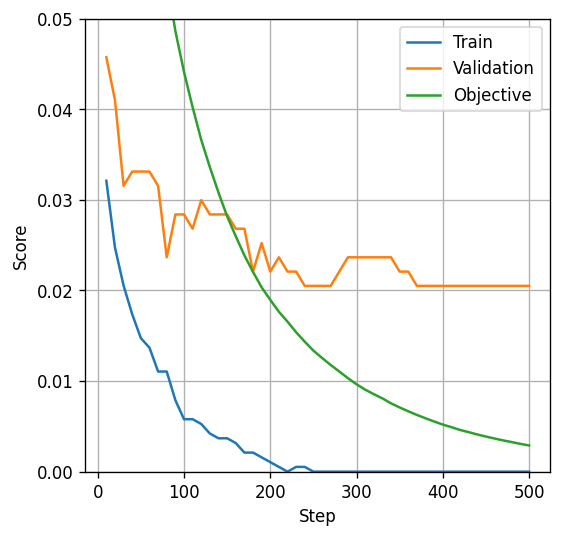

In [8]:
adaboost = AdaBoost(train_set, x_fields, y_field)

steps_list = []
train_score_list = []
val_score_list = []
objective_list = []
weighted_misclass_list = []

for step in tqdm.tqdm(range(1, 501)):
    weighted_misclass = adaboost.step()

    if (step % 10) == 0:
        train_score = calc_score(adaboost, train_set)
        val_score = calc_score(adaboost, val_set)

        steps_list.append(step)
        train_score_list.append(train_score)
        val_score_list.append(val_score)
        weighted_misclass_list.append(weighted_misclass)
        objective_list.append(adaboost.calc_objective())
    
## Plot
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(steps_list, train_score_list, label='Train')
ax.plot(steps_list, val_score_list, label='Validation')
ax.plot(steps_list, objective_list, label='Objective')
# ax.set_title(r'$\eta={' + f'{eta:g}' + r'}$')
ax.set_ylim(0, 0.05)
ax.set_xlabel('Step')
ax.set_ylabel('Score')
ax.legend();

Print the first 10 stump and coefficients

In [9]:
for i in range(10):
    stump_sign = '>' if (adaboost.signs[i] < 0) else '<'
    print(f'Step {i+1}: {adaboost.alphas[i]:.4f} * ({adaboost.fields[i]} {stump_sign} {adaboost.thresholds[i]:.2f})')

Step 1: 1.5245 * (meanfun > 0.14)
Step 2: 0.8207 * (IQR < 0.08)
Step 3: 0.3883 * (dfrange < 4.30)
Step 4: 0.4024 * (meanfun > 0.12)
Step 5: 0.4056 * (minfun < 0.02)
Step 6: 0.3351 * (sp.ent < 0.89)
Step 7: 0.3717 * (meanfun > 0.11)
Step 8: 0.3383 * (sfm > 0.55)
Step 9: 0.2939 * (IQR < 0.10)
Step 10: 0.2527 * (meanfreq < 0.18)


## Final evaluation

Evaluate the model using the test set

✍️ Complete the code below the evaluate the misclassification rate on the test set

In [10]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
test_score = calc_score(adaboost,test_set)
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

print(f'The misclassification rate on the test is: {test_score}')

The misclassification rate on the test is: 0.02050473186119874


You should get less then 2.5% error (take a look at the results from tutorial 11).

## AdaBoost in scikit-learn

The SciKit-learn package also has an implementation for [AdaBoost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html).

The code bellow uses SciKit-learn to run AdaBoost for 500 steps.

✍️ Complete the code below the evaluate the misclassification rate on the test set (don't use the "calc_score" function).

In [11]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=500, algorithm='SAMME')
clf.fit(train_set[x_fields].values, train_set[y_field].values)

## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
test_score = np.sum(clf.predict(test_set[x_fields].values) != test_set[y_field])/len(test_set[y_field])
# %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

print(test_score)

0.017350157728706624
